In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8','column 9','column 10','column 11','column 12']
df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\incomplete\Incomplete Datasets Without Labels\4-gauss\4-gauss_NL_5.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12
0,-0.360190,0.16134,0.067351,3.53370,0.469590,0.67908,3.43440,2.79240,2.77630,1.69910,3.81560,1.746400
1,-0.098505,NaN,2.062800,2.92160,0.424720,1.17850,1.68020,1.38880,3.21670,2.92360,0.77291,0.641450
2,-0.169460,0.50153,2.470900,3.06500,1.567600,1.48240,0.92160,2.64240,1.51870,2.53180,2.43280,1.876800
3,-0.136050,0.47279,0.588090,1.95630,2.787000,2.59570,2.89330,1.53750,0.99942,3.65930,0.61825,3.265800
4,0.098830,0.23418,0.429700,1.63120,3.554100,2.27110,0.37425,2.17860,1.31400,1.06320,1.02690,2.188400
...,...,...,...,...,...,...,...,...,...,...,...,...
795,3.769000,-2.68670,1.576000,0.55612,0.070769,2.07470,0.80304,3.22290,3.49330,1.32550,3.23110,0.005387
796,3.466600,-4.03460,3.100400,1.34610,1.377300,2.28870,0.39613,2.39610,2.46350,1.66750,2.46170,1.226700
797,3.344800,-2.38430,2.031000,2.26460,3.341200,1.53700,1.22560,0.74027,2.49540,1.34330,1.62250,1.585300
798,3.441400,-5.21630,1.577000,1.84400,1.098700,3.42430,NaN,3.72700,1.18790,0.95112,1.88450,1.143700


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	66
float64		column 2	40
float64		column 3	78
float64		column 4	65
float64		column 5	26
float64		column 6	26
float64		column 7	26
float64		column 8	52
float64		column 9	27
float64		column 10	26
float64		column 11	39
float64		column 12	0


In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12
count,734.000000,760.000000,722.000000,735.000000,774.000000,774.000000,774.000000,748.000000,773.000000,774.000000,761.000000,800.000000
mean,1.476127,1.282753,1.993541,1.938783,1.988286,2.004868,1.968871,2.011525,1.987023,2.011788,1.964775,1.962891
std,2.712449,3.609903,1.122246,1.142711,1.158487,1.127743,1.157356,1.127762,1.131827,1.142625,1.168715,1.125235
min,-4.442100,-6.952900,0.020547,0.002628,0.021103,0.001674,0.005922,0.004193,0.009369,0.002484,0.002000,0.000288
25%,-0.417660,-0.630317,1.050025,0.969645,0.983135,1.029600,0.963125,1.007025,1.060900,1.065200,0.919730,0.990685
50%,0.652480,0.920730,1.986900,1.926800,2.027350,2.001300,1.974400,2.020350,1.966400,2.034900,1.974100,1.950200
75%,3.931375,4.471600,2.886600,2.915350,2.946975,2.977675,2.964150,2.911175,2.982600,2.996475,2.988100,2.871625
max,6.982200,8.018800,3.977300,3.997300,3.998500,3.997500,3.999900,3.998200,3.996200,3.998800,3.990900,3.998300


<AxesSubplot:>

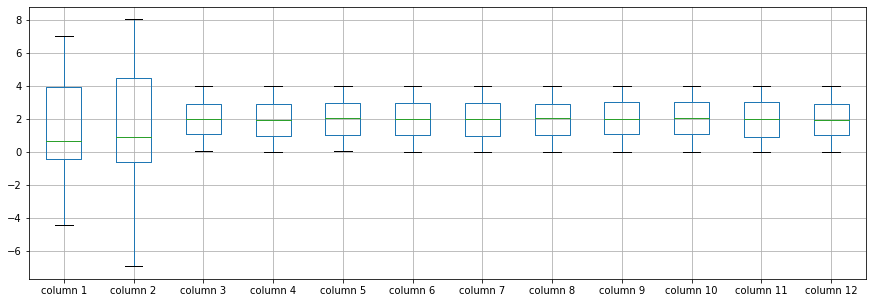

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1     1.476127
column 2     1.282753
column 3     1.993541
column 4     1.938783
column 5     1.988286
column 6     2.004868
column 7     1.968871
column 8     2.011525
column 9     1.987023
column 10    2.011788
column 11    1.964775
column 12    1.962891
dtype: float64

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12
column 1,1.000000,-0.406436,-0.021766,-0.004832,0.012096,0.053295,-0.006856,0.015758,0.002857,0.009176,0.029391,0.037274
column 2,-0.406436,1.000000,-0.009607,-0.023343,-0.024054,-0.023375,0.023990,-0.002837,0.003819,-0.063368,-0.095280,0.032007
column 3,-0.021766,-0.009607,1.000000,-0.033760,0.056474,-0.000193,0.016986,0.020090,0.040451,0.017862,-0.024381,0.004124
column 4,-0.004832,-0.023343,-0.033760,1.000000,-0.005817,-0.032756,0.046749,0.049285,-0.049106,0.049733,0.059883,0.001450
column 5,0.012096,-0.024054,0.056474,-0.005817,1.000000,0.054582,0.045475,0.005076,0.009884,-0.014979,-0.001167,0.009668
column 6,0.053295,-0.023375,-0.000193,-0.032756,0.054582,1.000000,-0.084655,0.050282,0.010685,0.027038,-0.037051,-0.016702
column 7,-0.006856,0.023990,0.016986,0.046749,0.045475,-0.084655,1.000000,-0.062936,-0.023913,-0.034173,-0.010929,0.014055
column 8,0.015758,-0.002837,0.020090,0.049285,0.005076,0.050282,-0.062936,1.000000,-0.049161,-0.044088,0.023908,-0.034371
column 9,0.002857,0.003819,0.040451,-0.049106,0.009884,0.010685,-0.023913,-0.049161,1.000000,0.021587,0.000699,-0.021209
column 10,0.009176,-0.063368,0.017862,0.049733,-0.014979,0.027038,-0.034173,-0.044088,0.021587,1.000000,-0.066008,0.062435


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [9]:
imputer = md.Midas(layer_structure = [12,12+86,12+86+86,12+86+86+86,12+86+86+86+86,12+86+86+86+86+86,12+86+86+86+86,12+86+86+86,12+86+86,12+86,12], vae_layer = False, seed = 60)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [12]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 28.037119522094727
Epoch: 1 , loss: 27.542711639404295
Epoch: 2 , loss: 25.541615676879882
Epoch: 3 , loss: 24.44816898345947
Epoch: 4 , loss: 23.82491138458252
Epoch: 5 , loss: 23.317850227355958
Epoch: 6 , loss: 22.615874824523925
Epoch: 7 , loss: 22.21289497375488
Epoch: 8 , loss: 21.669559135437012
Epoch: 9 , loss: 21.538424224853514
Epoch: 10 , loss: 21.110725021362306
Epoch: 11 , loss: 20.616659088134767
Epoch: 12 , loss: 20.526266593933105
Epoch: 13 , loss: 20.428245658874513
Epoch: 14 , loss: 20.12112777709961
Epoch: 15 , loss: 19.94453552246094
Epoch: 16 , loss: 19.823515014648436
Epoch: 17 , loss: 19.686464500427245
Epoch: 18 , loss: 19.512416191101075
Epoch: 19 , loss: 19.228868675231933
Epoch: 20 , loss: 19.30380748748779
Epoch: 21 , loss: 19.420839920043946
Epoch: 22 , loss: 19.081514625549318
Epoch: 23 , loss: 19.00193359375
Epoch: 24 , loss: 18.991101875305176
Epoch: 25 , loss: 18.922883

In [10]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(800, 12)

In [11]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1     0.463080
column 2     0.042845
column 3     3.034900
column 4     0.379700
column 5     2.475300
column 6     2.162000
column 7     1.670000
column 8     0.755510
column 9     2.032100
column 10    3.847400
column 11    0.230250
column 12    0.359250
Name: 21, dtype: float64

In [12]:
complete_df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\complete\Original Datasets Without Labels\4-gauss.xlsx', header=None,names=column_names)

In [13]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12
0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0
1,0.0,0.704547,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0
2,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0
3,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0
4,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
795,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0
796,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0
797,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0
798,0.0,0.000000,0.0,0.0,0.0,0.0,1.060479,0.0,0.0,0.0,0.000000,0.0


Calculating NRMSE Value

In [14]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [15]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [16]:
numerator=Frobenius_norm(new_df-complete_df)
denominator=Frobenius_norm(complete_df)
numerator, denominator

(47.10042101973544, 248.22200824735242)

In [17]:
NRMS=numerator/denominator
NRMS


0.18975118827013931

In [18]:
new_df.iloc[66,:]

column 1     0.20762
column 2    -0.55052
column 3     2.33990
column 4     1.79480
column 5     1.40130
column 6     2.76580
column 7     1.30410
column 8     1.24930
column 9     1.05940
column 10    1.28430
column 11    1.87940
column 12    0.57524
Name: 66, dtype: float64

In [19]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12
0,-0.360190,0.161340,0.067351,3.53370,0.469590,0.67908,3.434400,2.79240,2.77630,1.69910,3.815600,1.746400
1,-0.098505,0.525977,2.062800,2.92160,0.424720,1.17850,1.680200,1.38880,3.21670,2.92360,0.772910,0.641450
2,-0.169460,0.501530,2.470900,3.06500,1.567600,1.48240,0.921600,2.64240,1.51870,2.53180,2.432800,1.876800
3,-0.136050,0.472790,0.588090,1.95630,2.787000,2.59570,2.893300,1.53750,0.99942,3.65930,0.618250,3.265800
4,0.098830,0.234180,0.429700,1.63120,3.554100,2.27110,0.374250,2.17860,1.31400,1.06320,1.026900,2.188400
...,...,...,...,...,...,...,...,...,...,...,...,...
795,3.769000,-2.686700,1.576000,0.55612,0.070769,2.07470,0.803040,3.22290,3.49330,1.32550,3.231100,0.005387
796,3.466600,-4.034600,3.100400,1.34610,1.377300,2.28870,0.396130,2.39610,2.46350,1.66750,2.461700,1.226700
797,3.344800,-2.384300,2.031000,2.26460,3.341200,1.53700,1.225600,0.74027,2.49540,1.34330,1.622500,1.585300
798,3.441400,-5.216300,1.577000,1.84400,1.098700,3.42430,1.871289,3.72700,1.18790,0.95112,1.884500,1.143700


In [20]:
imputations[-1].to_excel("4-gauss_NL_5(imp).xlsx", index=False, header=False)